In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 데이터 불러오기
data = pd.read_csv("data/auto-mpg.csv",index_col='car name')

In [3]:
# 데이터 미리보기
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
# 인덱스 확인
data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=398)

In [5]:
# 컬럼 확인
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [6]:
# 데이터 크기 확인
data.shape

(398, 8)

In [7]:
# 결측치 확인
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [8]:
# 데이터 타입 확인
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [9]:
# 'horsepower' 고유값 확인
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [10]:
# 'horsepower'의 모든 고유한 값을 출력하면 결측값의 자리 표시자로 사용된 '?'가 있음을 알 수 있습니다. 이 항목들을 삭제하지 마십시오.
data = data[data.horsepower != '?']

In [11]:
print('?' in data.horsepower)

False


In [12]:
data.shape , data.dtypes

((392, 8),
 mpg             float64
 cylinders         int64
 displacement    float64
 horsepower       object
 weight            int64
 acceleration    float64
 model year        int64
 origin            int64
 dtype: object)

In [13]:
# 'horsepower' float타입으로 변경
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [14]:
# 데이터 정보확인
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [15]:
# 'mpg' 정보확인
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<AxesSubplot: xlabel='mpg', ylabel='Density'>

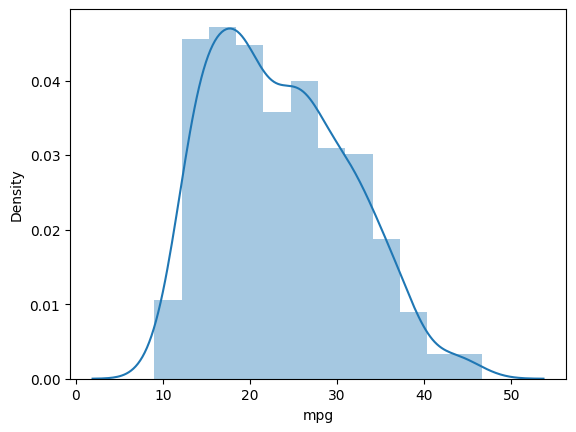

In [16]:
sns.distplot(data['mpg'])

In [17]:
# 왜도 (skewness), 첨도(kurtosis)  확인
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [18]:
# 범위 정하기
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [19]:
data_scale = data.copy()

In [20]:
# 변수 새롭게 할당하기
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [21]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [22]:
# 'origin' 항목 나라명으로 변경하기
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [23]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


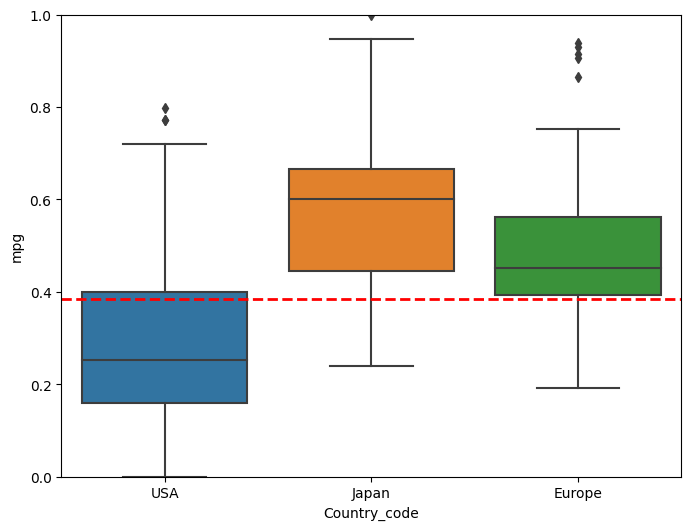

In [24]:
# 박스플롯 시각화('Country_code'에 대한 'mpg')
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

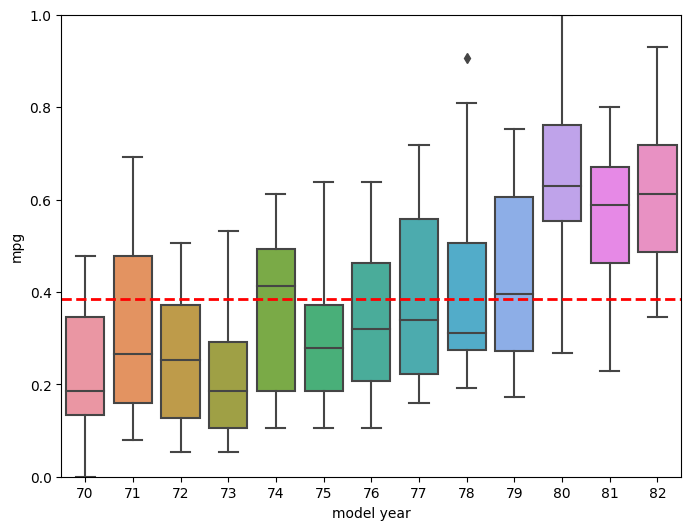

In [25]:
# 박스플롯 시각화('model year'에 대한 'mpg')
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

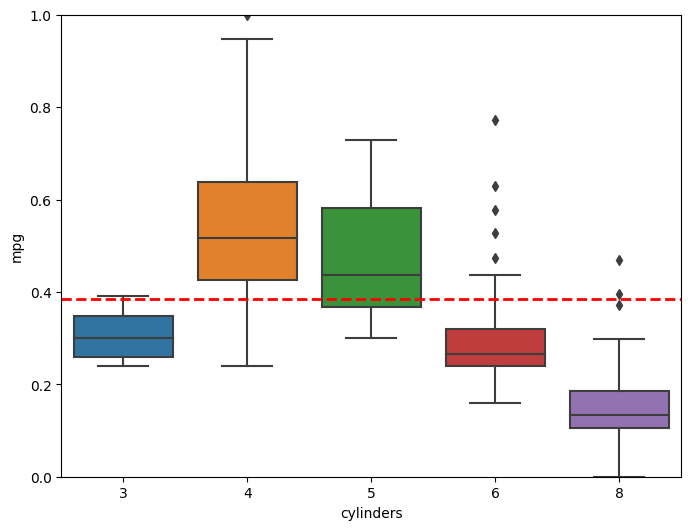

In [26]:
# 박스플롯 시각화('cylinders'에 대한 'mpg')
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

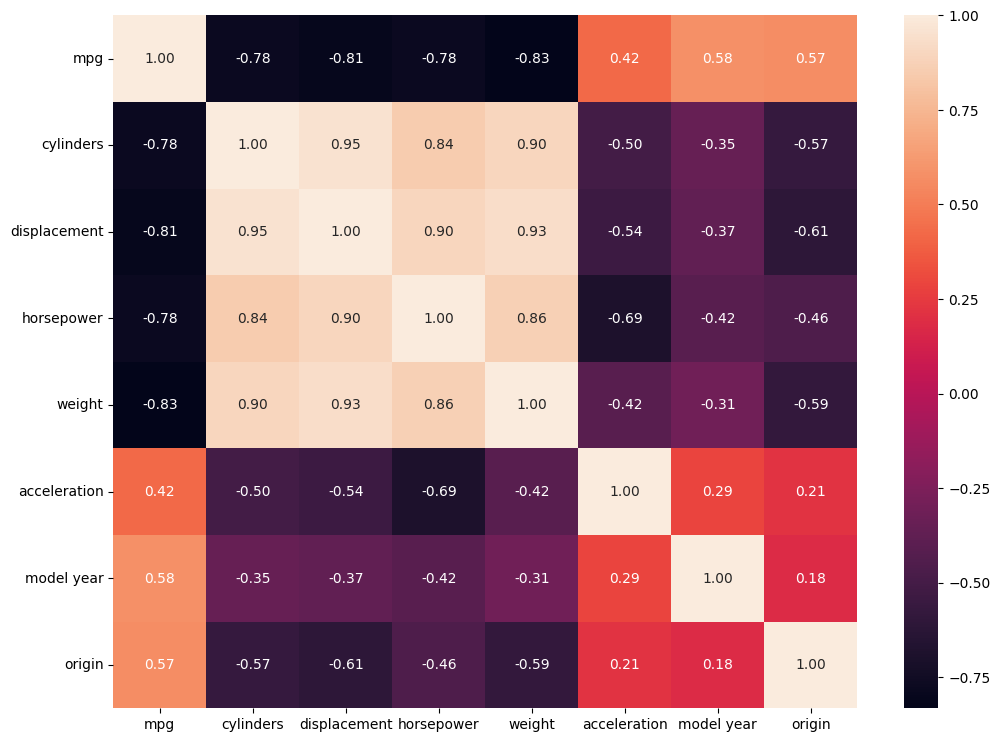

In [27]:
# 히트맵으로 상관관계 시각화
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, fmt='.2f');

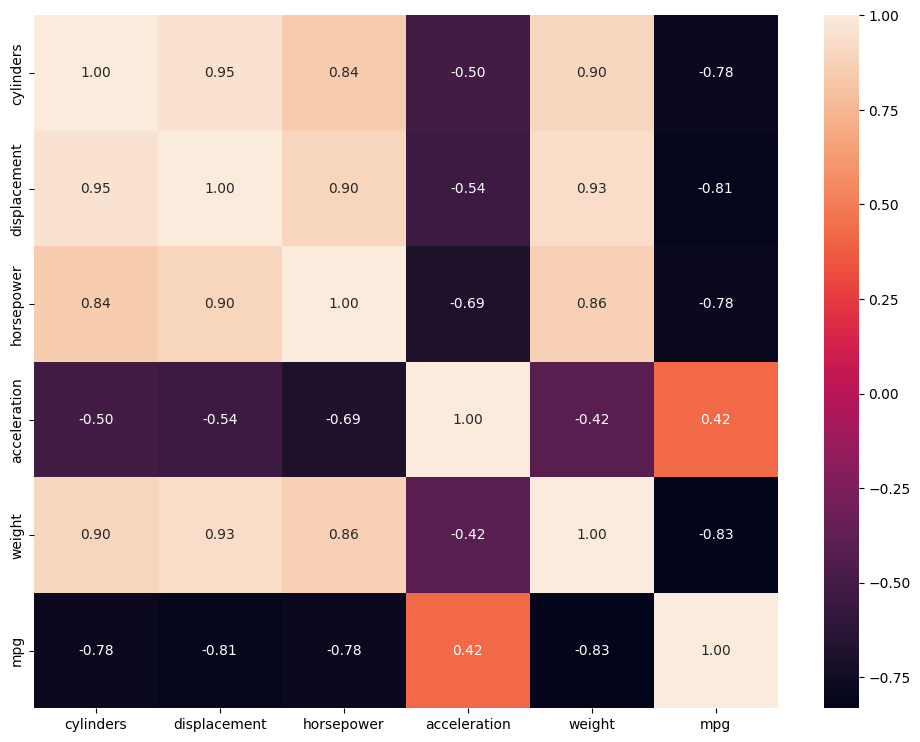

In [28]:
# ['cylinders','displacement','horsepower','acceleration','weight','mpg'] 상관관계 히트맵 시각화
factors = ['cylinders','displacement','horsepower','acceleration','weight','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True, fmt='.2f');

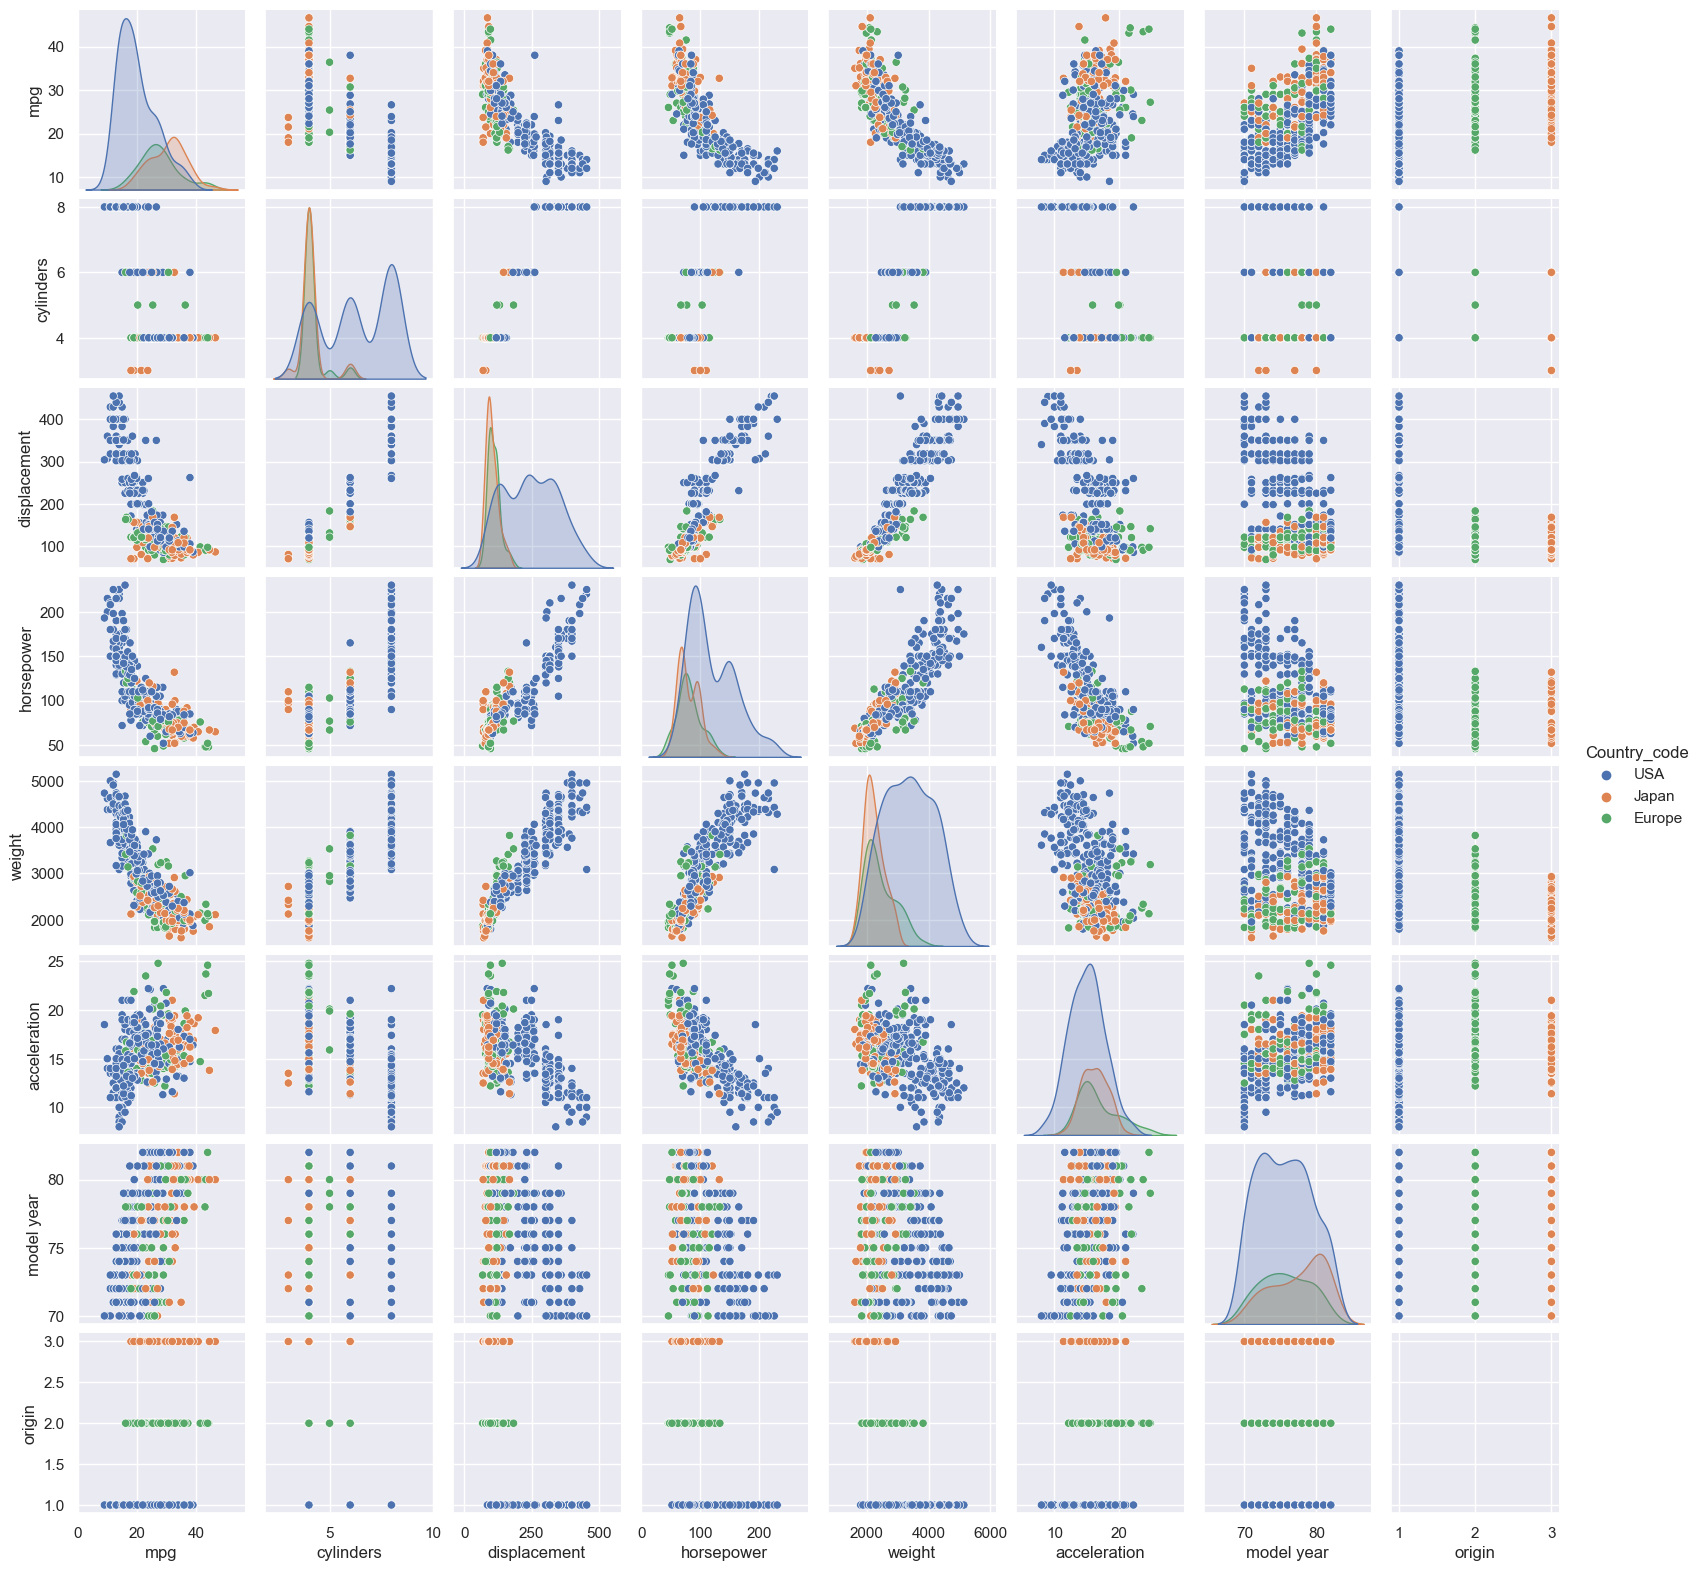

In [29]:
# scatterplot 시각화
sns.set()
sns.pairplot(data, size = 2.0,hue ='Country_code')
plt.show()

In [30]:
data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car name', length=392)

In [31]:
# 정규표현식을 사용해 회사이름 추출
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru dlsubaru dl', 'subaru dlsubaru dl', 'subaru dlsubaru dl',
       'subaru dlsubaru dl'],
      dtype='object', name='car name')

In [60]:
# 여기부터 오류해결 못함ㅠ
data['Company_Name'] = data.index.str.extract('(^.*?)\s')

In [62]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)

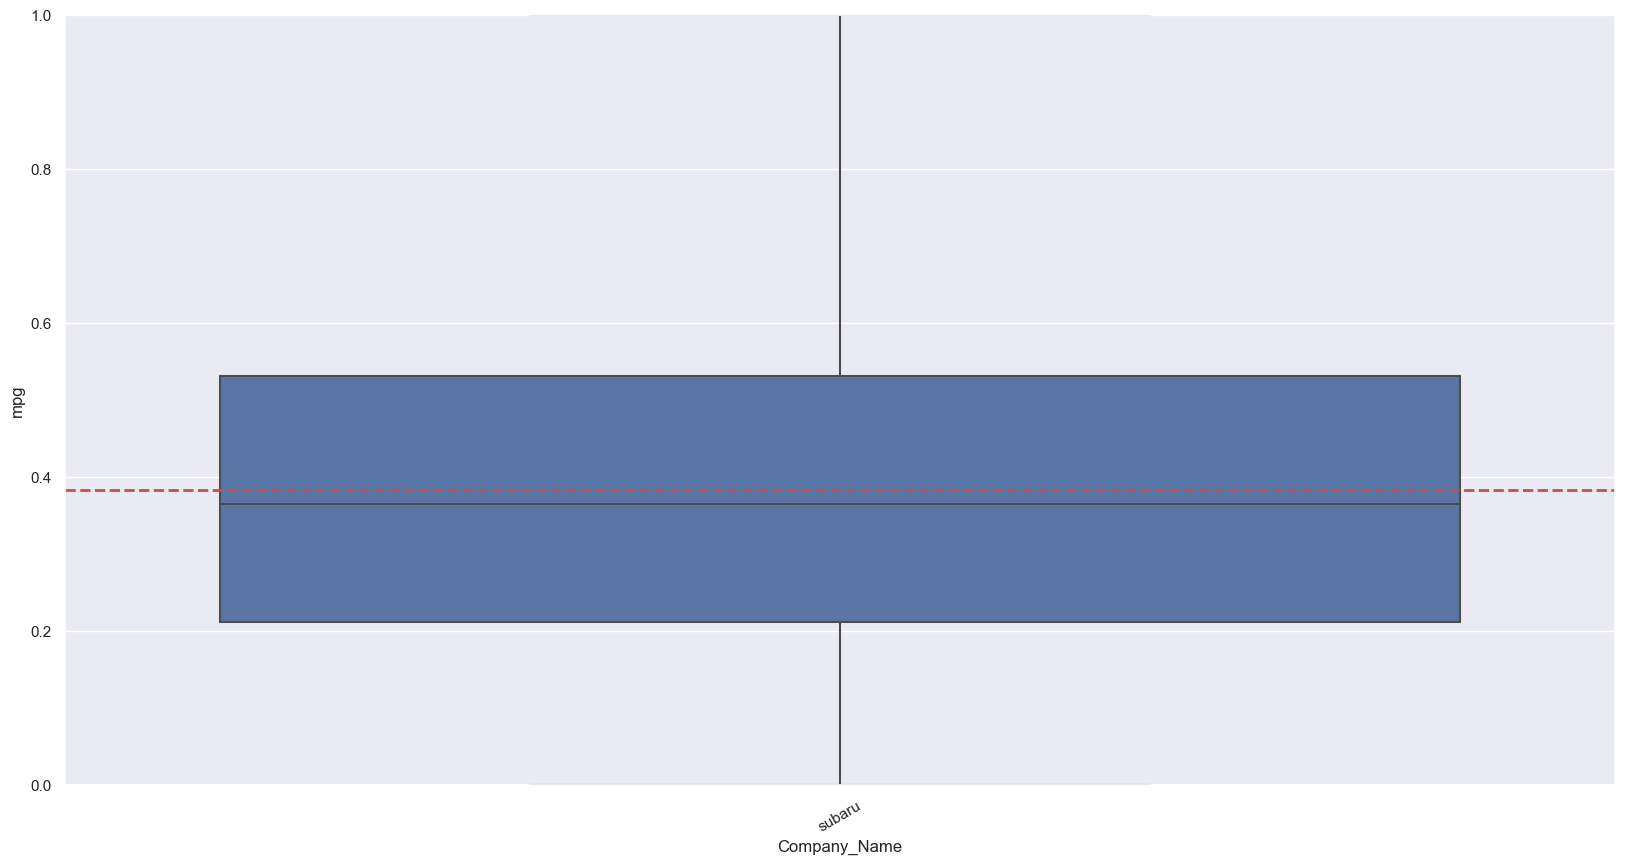

In [63]:
# 박스플롯 시각화('cylinders'에 대한 'mpg')
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [64]:
data.Company_Name.isnull().sum()

0

In [65]:
var='mpg'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,1,USA,subaru


In [66]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
mazda glc,46.6,4,86.0,65.0,2110,17.9,80,3,Japan,subaru


In [67]:
var='displacement'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
fiat 128,29.0,4,68.0,49.0,1867,19.5,73,2,Europe,subaru


In [68]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru
buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,1,USA,subaru


In [69]:
var='horsepower'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
volkswagen 1131 deluxe sedan,26.0,4,97.0,46.0,1835,20.5,70,2,Europe,subaru
volkswagen super beetle,26.0,4,97.0,46.0,1950,21.0,73,2,Europe,subaru


In [70]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru


In [71]:
var='weight'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,3,Japan,subaru


In [72]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,1,USA,subaru


In [73]:
var='acceleration'
data[data[var]== data[var].min()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,1,USA,subaru


In [74]:
data[data[var]== data[var].max()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name
car name,,,,,,,,,,
peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,2,Europe,subaru


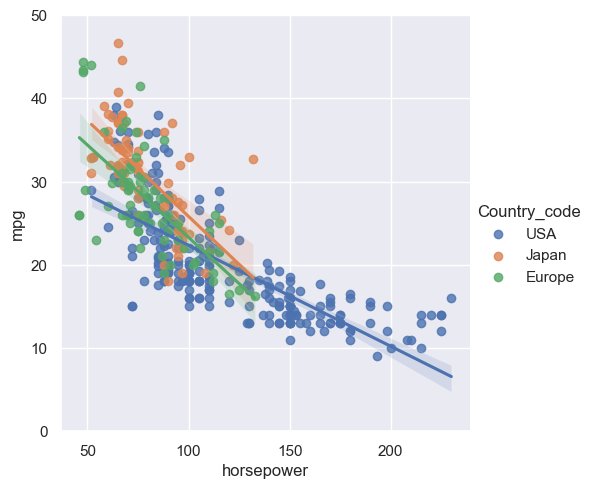

In [79]:
# lmplot 시각화 (mpg,horsepower)
var = 'horsepower'
plot = sns.lmplot(data=data, x=var,y='mpg',hue='Country_code')
plot.set(ylim = (0,50))

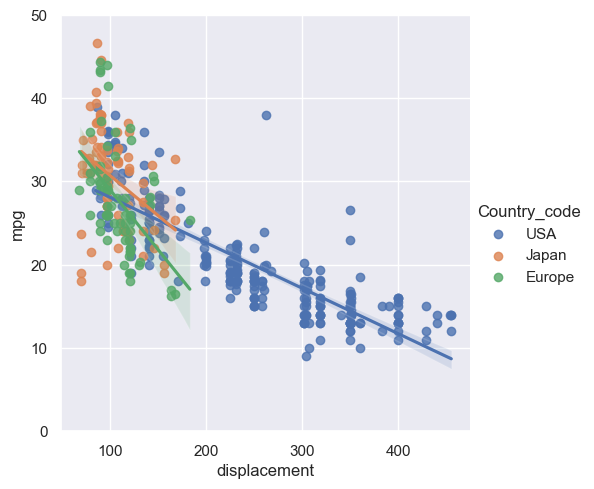

In [81]:
# lmplot 시각화 (mpg,displacement)
var = 'displacement'
plot = sns.lmplot(data=data, x=var,y='mpg',hue='Country_code')
plot.set(ylim = (0,50))

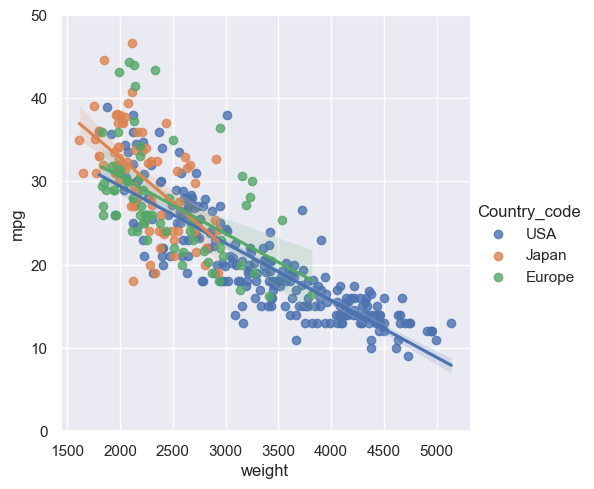

In [82]:
var = 'weight'
plot = sns.lmplot(data=data, x=var,y='mpg',hue='Country_code')
plot.set(ylim = (0,50))

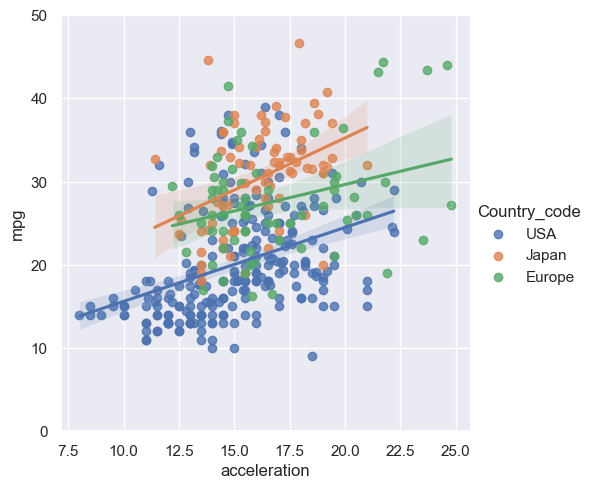

In [83]:
var = 'acceleration'
plot = sns.lmplot(data=data, x=var,y='mpg',hue='Country_code')
plot.set(ylim = (0,50))

In [84]:
data['Power_to_weight'] = ((data.horsepower*0.7457)/data.weight)

In [85]:
# 'Power_to_weight' 내림차순으로 정렬
data.sort_values(by='Power_to_weight',ascending=False ).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369
pontiac grand prix,16.0,8,400.0,230.0,4278,9.5,73,1,USA,subaru,0.040091
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
bmw 2002,26.0,4,121.0,113.0,2234,12.5,70,2,Europe,subaru,0.037719
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679


In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [87]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','origin','model year']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

In [88]:
X = StandardScaler().fit_transform(X)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [90]:
regressor = LinearRegression()

In [91]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [92]:
regressor.fit(X_train,y_train)

LinearRegression()

In [93]:
y_predicted = regressor.predict(X_test)

In [94]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

In [95]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=4000)

In [96]:
gb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [97]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [98]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.6727335850149063

<AxesSubplot: >

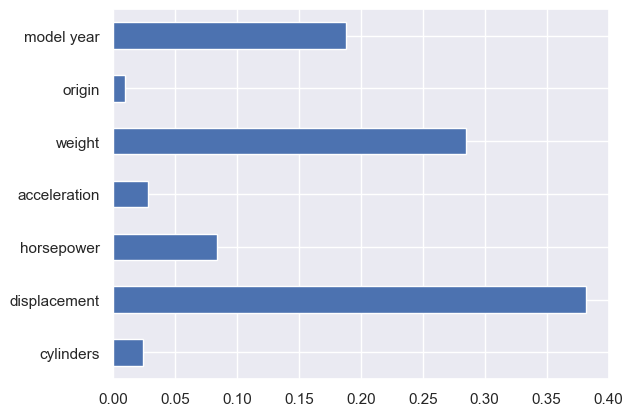

In [99]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

In [100]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(n_components=2)

In [102]:
pca.fit(data[factors])

PCA(n_components=2)

In [103]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [104]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

In [106]:
transformed_data = pca.transform(data[factors])

In [107]:
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]

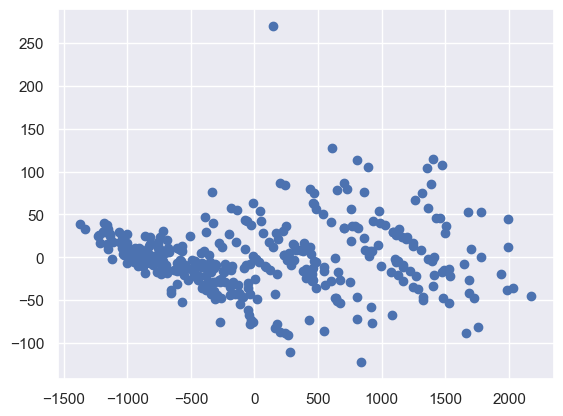

In [108]:
plt.scatter(pc1,pc2)

In [109]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])

In [110]:
factors

['cylinders',
 'displacement',
 'horsepower',
 'acceleration',
 'weight',
 'origin',
 'model year']

In [111]:
data[(data['model year'] == 70 )&( data.displacement>400)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code,Company_Name,Power_to_weight
car name,,,,,,,,,,,
ford galaxie 500,15.0,8,429.0,198.0,4341,10.0,70,1,USA,subaru,0.034013
chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,1,USA,subaru,0.037679
plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,1,USA,subaru,0.037181
pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,1,USA,subaru,0.037917
buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,1,USA,subaru,0.054369


In [112]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [113]:
grid = grid.fit(X_train, y_train)

In [114]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=48)

In [115]:
gb_regressor_t = grid.best_estimator_

In [116]:
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=48)

In [117]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)

In [118]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.711012216675972

In [119]:
data.duplicated().sum()

0